In [2]:
import pandas as pd

dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
dados.shape

(7043, 18)

## Diferentes variáveis

In [4]:
#modificação de forma manual

traducao_dic = {
    'Sim': 1,
    'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
#transformação pelo get_dummies

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis = 1))

#junção dos dados transformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis = 1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


## Definição formal

x => inputs
y => outputs

In [6]:
#dica

pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [7]:
#dados da maria que queremos descobrir se o churn é sim ou não
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

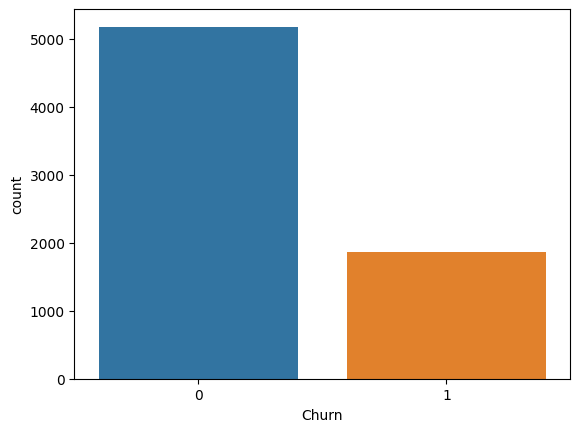

In [8]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [9]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [12]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


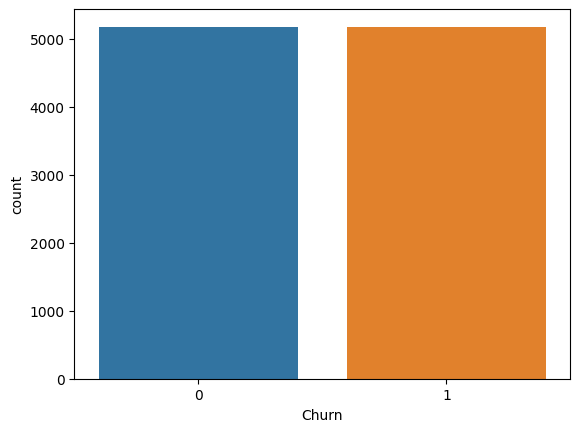

In [13]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## Modelo K-Nearest Neighbors (KNN)

In [14]:
#deixar os valores na mesma escala

from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado[0]


array([ 1.26542767, -0.52756038, -3.06083934,  0.81465673, -0.41350409,
       -1.10771299, -1.32176003, -0.99594945,  3.06083934, -0.93540224,
        1.48315631, -1.05853285, -0.44850949,  0.77851405, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35092813,  0.91935908,
       -0.44850949, -0.73960631,  0.7857356 , -0.44850949, -0.60652979,
        1.08898545, -0.44850949, -0.84621879,  1.10588699, -0.44850949,
       -0.85804523, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
        1.05382378, -0.54742438, -0.5311508 ])

In [15]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673, -0.41350409,
        -1.14937735, -0.97235319,  1.00406703, -0.32670777, -0.93540224,
        -0.67423777,  0.94470379, -0.44850949,  0.77851405, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35092813,  0.91935908,
         2.22960721, -0.73960631, -1.27269275,  2.22960721, -0.60652979,
         1.08898545, -0.44850949, -0.84621879, -0.90425153, -0.44850949,
         1.16543973, -0.4605816 , -1.45333425,  2.1147664 , -0.50805069,
        -0.94892525, -0.54742438,  1.88270449]])

In [16]:
#vamos utilizar a distância euclidiana

import numpy as np

a = Xmaria_normalizado
b = X_normalizado[0]

distancia_maria = np.sqrt(np.sum(np.square(a-b)))
distancia_maria

9.370378823649494

implementando o modelo

In [17]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

Treino e teste

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(metric = 'euclidean') #por padrão são 5 vizinhos
knn.fit(X_treino, y_treino)
predito_knn = knn.predict(X_teste)
predito_knn

acuracia = accuracy_score(y_teste, predito_knn) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 81.06%


## teorema de naive bayes

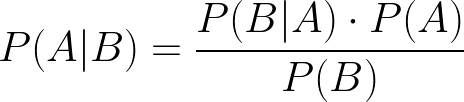

In [19]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ]])

In [20]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [23]:
#usaremos a mediana porque é o valor central dos dados ordenados

np.median(X_treino)
X_treino_binarizado = np.where(X_treino > np.median(X_treino), 1, 0)

In [24]:
#biblioteca do naive bayes

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_treino_binarizado, y_treino)
predito_bnb = bnb.predict(X_teste)

In [26]:
acuracia = accuracy_score(y_teste, predito_bnb) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 77.00%


In [27]:
#utilizando arvore de decisão

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", random_state = 42)
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
dtc.feature_importances_

array([0.01931254, 0.01498402, 0.0022466 , 0.02050024, 0.01536196,
       0.15277778, 0.20830899, 0.00850824, 0.00387764, 0.01559183,
       0.00604003, 0.00145612, 0.        , 0.05344973, 0.        ,
       0.01661545, 0.00797701, 0.        , 0.00989292, 0.00962338,
       0.        , 0.01089861, 0.01428183, 0.        , 0.01501346,
       0.00533724, 0.        , 0.00490741, 0.00814576, 0.        ,
       0.01870869, 0.00893017, 0.23348935, 0.02775035, 0.01662939,
       0.03572187, 0.01351081, 0.02015059])

In [29]:
predito_tree = dtc.predict(X_teste)
predito_tree

acuracia = accuracy_score(y_teste, predito_tree) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 81.71%


#Matriz de confusão

In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, predito_knn))

[[1245  324]
 [ 264 1272]]


In [33]:
print(confusion_matrix(y_teste, predito_bnb))

[[1060  509]
 [ 205 1331]]


In [34]:
print(confusion_matrix(y_teste, predito_tree))

[[1288  281]
 [ 287 1249]]


#Acurácia

In [36]:
from sklearn.metrics import accuracy_score

#modelo knn
print(accuracy_score(y_teste, predito_knn)*100)

81.06280193236715


In [37]:
#modelo bernoulli naive bayes
print(accuracy_score(y_teste, predito_bnb)*100)

77.0048309178744


In [38]:
#modelo árvore de decisão
print(accuracy_score(y_teste, predito_tree)*100)

81.70692431561997


#Precisão

In [39]:
from sklearn.metrics import precision_score

#modelo knn
print(precision_score(y_teste, predito_knn)*100)

79.69924812030075


In [40]:
#modelo bnb
print(precision_score(y_teste, predito_bnb)*100)

72.33695652173913


In [41]:
#modelo arvore de decisao
print(precision_score(y_teste, predito_tree)*100)

81.63398692810458


#Recall

In [42]:
from sklearn.metrics import recall_score

#modelo knn
print(recall_score(y_teste, predito_knn)*100)

82.8125


In [43]:
#modelo bnb
print(recall_score(y_teste, predito_bnb)*100)

86.65364583333334


In [44]:
#modelo arvore de decisão
print(recall_score(y_teste, predito_tree)*100)

81.31510416666666
